# Train Model

In [1]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [3]:
import os
import random

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import KFold
from sklearn.preprocessing import OneHotEncoder

import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras.losses import sparse_categorical_crossentropy, categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
from keras.utils.vis_utils import plot_model

from util import *

Using TensorFlow backend.


In [4]:
print("Version: ", tf.__version__)
# tf.compat.v1.enable_eager_execution() # Enable eager execution
print("Eager mode: ", tf.executing_eagerly())
print("Hub version: ", hub.__version__)
print("GPU is", "available" if tf.config.experimental.list_physical_devices('GPU') else "NOT AVAILABLE")
# print("GPU is", "available" if tf.test.is_gpu_available() else "NOT AVAILABLE")

Version:  1.15.2
Eager mode:  False
Hub version:  0.12.0
GPU is available


## Prepare & load data

In [5]:
def shuffle_dataset(sentences, lables):
    # random.seed(24)

    shuffled_data = list(zip(sentences, label))
    random.shuffle(shuffled_data)
    shuf_sentences, shuf_label = zip(*shuffled_data)
    return shuf_sentences, shuf_label

In [6]:
def acc_plot(history, fold, save_path):
    '''
    Plot training accuracy graph.
    '''

    epochs = range(len(history.history['acc']))

    plt.plot(epochs, history.history['acc'], 'r', label='Training accuracy')
    plt.plot(epochs, history.history['val_acc'], 'b', label='Validation accuracy')
    plt.title(f'Training and validation accuracy (Text) - Fold#{fold}')
    plt.legend(loc=0)
    plt.figure()

    plt.savefig(save_path + f'/acc_fold_#{fold}.png')
    plt.show()

In [7]:
def loss_plot(history, fold, save_path):
    '''
    Plot training loss graph.
    '''

    epochs = range(len(history.history['loss']))

    plt.plot(epochs, history.history['loss'], 'r', label='Training loss')
    plt.plot(epochs, history.history['val_loss'], 'b', label='Validation loss')
    plt.title(f'Training and validation loss (Text) - Fold#{fold}')
    plt.legend(loc=0)
    plt.figure()

    plt.savefig(save_path + f'/loss_fold_#{fold}.png')
    plt.show()

In [8]:
sentences, label = [], []

with open('/content/drive/MyDrive/Colab Notebooks/My Project - SER/data/FC_sentence.txt') as f:
    with open('/content/drive/MyDrive/Colab Notebooks/My Project - SER/data/FC_label.txt') as f2:
        full_sentences = f.readlines()
        category = f2.readlines()

sentences = [x.strip() for x in full_sentences]
label = [y.strip() for y in category]

sentences, label = shuffle_dataset(sentences, label)

In [9]:
sent_train = sentences[:5000]
label_train = label[:5000]

sent_test = sentences[5000:]
label_test = label[5000:]

print(f'Train length --> {len(sent_train)}, Train length --> {len(label_train)}')
print(f'Test length --> {len(sent_test)}, Train length --> {len(label_test)}')

data_dict = {'sentences':sent_train, 'label':label_train}
dataset = pd.DataFrame.from_dict(data_dict)

Train length --> 5000, Train length --> 5000
Test length --> 531, Train length --> 531


In [10]:
dataset.head()

,sentences,label
0,Oh yes I am.,ang
1,[BREATHING],hap
2,You- you- you'll find.,neu
3,"Oh, no way.",hap
4,What? What? You look really happy what's going...,hap


## One-hot encode label

In [11]:
enc = OneHotEncoder(sparse=False)
label_encode = enc.fit_transform(dataset[['label']])

In [12]:
enc.categories_

[array(['ang', 'hap', 'neu', 'sad'], dtype=object)]

## Build ELMo embedding

In [13]:
ELMo_MODEL = "https://tfhub.dev/google/elmo/3"
hub_layer = hub.KerasLayer(ELMo_MODEL, input_shape=[], output_key="elmo", dtype=tf.string)
# hub_layer(tf.convert_to_tensor(['Is there a problem?'], dtype='string'))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Instructions for updating:
If using Keras pass *_constraint arguments to layers.


## Build model

In [14]:
# K-fold configuration
num_folds = 10

# Model configuration
batch_size = 64
loss_function = categorical_crossentropy
no_classes = 4
no_epochs = 30
grad_clip_value = 5.0
learn_rate = 1e-4
verbosity = 1
optimizer = Adam(learning_rate=learn_rate, clipnorm=grad_clip_value)

In [15]:
# Define the K-fold Cross Validator
kfold = KFold(n_splits=num_folds, shuffle=True)
fold = 1

acc_per_fold = []
loss_per_fold = []

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


------------------------------------------------------------------------
Training for fold #1 ...
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 4500 samples, validate on 500 samples
Epoch 1/30
4500/4500 [==============================] - 63s 14ms/sample - loss: 1.3922 - acc: 0.3258 - val_loss: 1.3698 - val_acc: 0.4040
Epoch 2/30
4500/4500 [==============================] - 43s 10ms/sample - loss: 1.4330 - acc: 0.3680 - val_loss: 1.3243 - val_acc: 0.4300
Epoch 3/30
4500/4500 [==============================] - 43s 10ms/sample - loss: 1.3548 - acc: 0.4000 - val_loss: 1.2957 - val_acc: 0.4440
Epoch 4/30
4500/4500 [==============================] - 42s 9ms/sample - loss: 1.2859 - acc: 0.4369 - val_loss: 1.2424 - val_acc: 0.4480
Epoch 5/30
4500/4500 [==============================] - 43s 10ms/sample - loss: 1.2592 - acc: 0.4653 - val_loss: 1.2302 - val_acc: 0.4540
Epoch 6/30
4500/4500 [==============================] - 42s 9ms/sample - loss: 1.2120 - acc: 0.4860 - val_loss: 1.1882 - val_acc: 0.4840
Epoch 7/30
4500/4500 [==============================] - 43s 10ms/sample - loss: 1.1925 - acc: 0.5149 - val_loss: 1.1236 - val_a

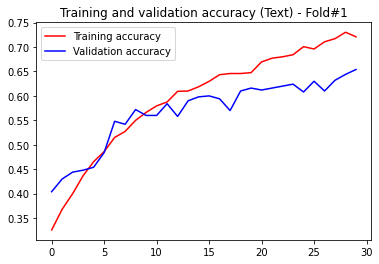

<Figure size 432x288 with 0 Axes>

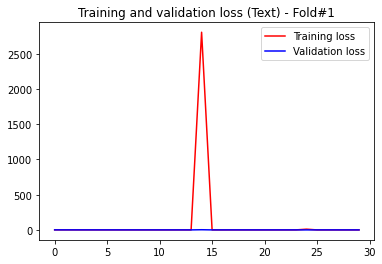

<Figure size 432x288 with 0 Axes>

Saving Model for fold #1...
Score for fold #1: loss of 0.9257170009613037; acc of 65.20000100135803%


------------------------------------------------------------------------
Training for fold #2 ...
Train on 4500 samples, validate on 500 samples
Epoch 1/30
4500/4500 [==============================] - 48s 11ms/sample - loss: 1.4226 - acc: 0.3462 - val_loss: 1.3110 - val_acc: 0.4220
Epoch 2/30
4500/4500 [==============================] - 42s 9ms/sample - loss: 1.2775 - acc: 0.4313 - val_loss: 1.2290 - val_acc: 0.4460
Epoch 3/30
4500/4500 [==============================] - 44s 10ms/sample - loss: 1.3889 - acc: 0.4991 - val_loss: 1.1469 - val_acc: 0.5120
Epoch 4/30
4500/4500 [==============================] - 43s 10ms/sample - loss: 1.1277 - acc: 0.5407 - val_loss: 1.0892 - val_acc: 0.5540
Epoch 5/30
4500/4500 [==============================] - 43s 9ms/sample - loss: 1.1074 - acc: 0.5620 - val_loss: 1.0773 - val_acc: 0.5620
Epoch 6/30
4500/4500 [==============================] - 44s 10ms/sample - loss: 1.1545 - acc: 0.5962 - val_loss: 1.0959 - val_acc: 0.5720
Epoch 7/30
4500/4500 [=======

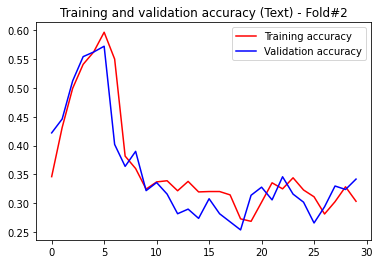

<Figure size 432x288 with 0 Axes>

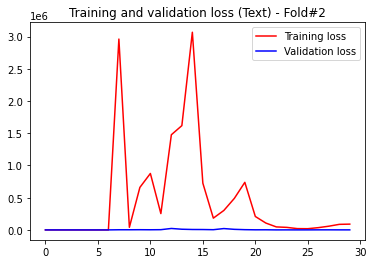

<Figure size 432x288 with 0 Axes>

Saving Model for fold #2...
Score for fold #2: loss of 373.59157849121095; acc of 31.600001454353333%


------------------------------------------------------------------------
Training for fold #3 ...
Train on 4500 samples, validate on 500 samples
Epoch 1/30
4500/4500 [==============================] - 48s 11ms/sample - loss: 1.3778 - acc: 0.3460 - val_loss: 1.2588 - val_acc: 0.4440
Epoch 2/30
4500/4500 [==============================] - 43s 10ms/sample - loss: 1.2382 - acc: 0.4636 - val_loss: 1.1880 - val_acc: 0.4980
Epoch 3/30
4500/4500 [==============================] - 44s 10ms/sample - loss: 1.4409 - acc: 0.5216 - val_loss: 2.2357 - val_acc: 0.5200
Epoch 4/30
4500/4500 [==============================] - 43s 10ms/sample - loss: 1.1288 - acc: 0.5498 - val_loss: 1.1600 - val_acc: 0.5340
Epoch 5/30
4500/4500 [==============================] - 43s 10ms/sample - loss: 2.1090 - acc: 0.5764 - val_loss: 1.0607 - val_acc: 0.5620
Epoch 6/30
4500/4500 [==============================] - 43s 9ms/sample - loss: 1.6539 - acc: 0.5936 - val_loss: 1.0411 - val_acc: 0.5660
Epoch 7/30
4500/4500 [======

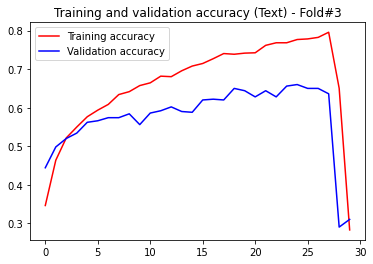

<Figure size 432x288 with 0 Axes>

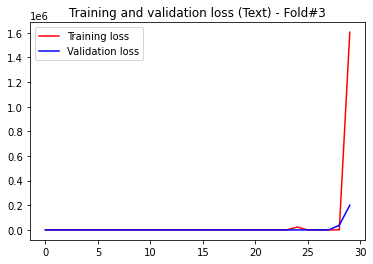

<Figure size 432x288 with 0 Axes>

Saving Model for fold #3...
Score for fold #3: loss of 88777.38247460937; acc of 28.999999165534973%


------------------------------------------------------------------------
Training for fold #4 ...
Train on 4500 samples, validate on 500 samples
Epoch 1/30
4500/4500 [==============================] - 48s 11ms/sample - loss: 9646995.6166 - acc: 0.3133 - val_loss: 3144.9023 - val_acc: 0.2780
Epoch 2/30
4500/4500 [==============================] - 44s 10ms/sample - loss: 1333895.3280 - acc: 0.3016 - val_loss: 10689.8329 - val_acc: 0.3100
Epoch 3/30
4500/4500 [==============================] - 44s 10ms/sample - loss: 69425079.7136 - acc: 0.2844 - val_loss: 151217.4189 - val_acc: 0.2980
Epoch 4/30
4500/4500 [==============================] - 44s 10ms/sample - loss: 317085906.3465 - acc: 0.2876 - val_loss: 255025.1043 - val_acc: 0.3180
Epoch 5/30
4500/4500 [==============================] - 43s 10ms/sample - loss: 103702624.9148 - acc: 0.2838 - val_loss: 586777.2764 - val_acc: 0.2700
Epoch 6/30
4500/4500 [==============================] - 43s 10ms/sample - loss: 5986354172.0992 - acc: 0.280

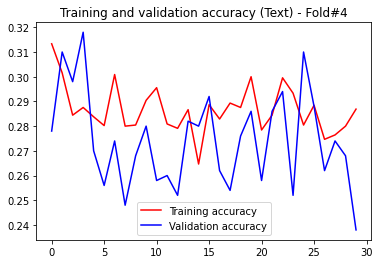

<Figure size 432x288 with 0 Axes>

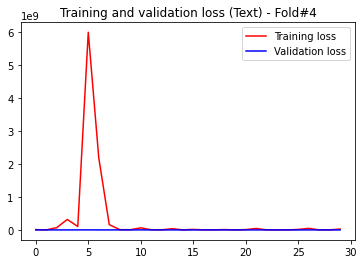

<Figure size 432x288 with 0 Axes>

Saving Model for fold #4...
Score for fold #4: loss of 27529.090724609374; acc of 23.800000548362732%


------------------------------------------------------------------------
Training for fold #5 ...
Train on 4500 samples, validate on 500 samples
Epoch 1/30
4500/4500 [==============================] - 50s 11ms/sample - loss: 1.4737 - acc: 0.3602 - val_loss: 1.3055 - val_acc: 0.4140
Epoch 2/30
4500/4500 [==============================] - 43s 10ms/sample - loss: 1.2860 - acc: 0.4460 - val_loss: 1.2565 - val_acc: 0.4420
Epoch 3/30
4500/4500 [==============================] - 43s 10ms/sample - loss: 1.1769 - acc: 0.5069 - val_loss: 1.1657 - val_acc: 0.5300
Epoch 4/30
4500/4500 [==============================] - 43s 10ms/sample - loss: 1.0924 - acc: 0.5609 - val_loss: 1.1347 - val_acc: 0.5380
Epoch 5/30
4500/4500 [==============================] - 42s 9ms/sample - loss: 1.0368 - acc: 0.5822 - val_loss: 1.0843 - val_acc: 0.5760
Epoch 6/30
4500/4500 [==============================] - 43s 10ms/sample - loss: 0.9773 - acc: 0.6020 - val_loss: 1.0923 - val_acc: 0.5400
Epoch 7/30
4500/4500 [======

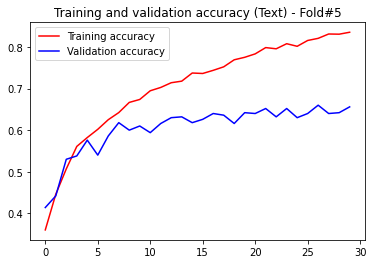

<Figure size 432x288 with 0 Axes>

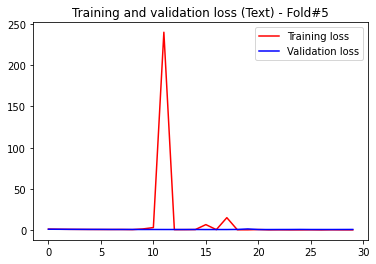

<Figure size 432x288 with 0 Axes>

Saving Model for fold #5...
Score for fold #5: loss of 1.032876705646515; acc of 65.6000018119812%


------------------------------------------------------------------------
Training for fold #6 ...
Train on 4500 samples, validate on 500 samples
Epoch 1/30
4500/4500 [==============================] - 50s 11ms/sample - loss: 1.3811 - acc: 0.3624 - val_loss: 1.3179 - val_acc: 0.4080
Epoch 2/30
4500/4500 [==============================] - 43s 10ms/sample - loss: 1.2926 - acc: 0.4553 - val_loss: 1.2465 - val_acc: 0.4400
Epoch 3/30
4500/4500 [==============================] - 44s 10ms/sample - loss: 1.1770 - acc: 0.5060 - val_loss: 1.1773 - val_acc: 0.5080
Epoch 4/30
4500/4500 [==============================] - 44s 10ms/sample - loss: 1.0944 - acc: 0.5516 - val_loss: 1.1425 - val_acc: 0.5200
Epoch 5/30
4500/4500 [==============================] - 44s 10ms/sample - loss: 1.2474 - acc: 0.5767 - val_loss: 1.0798 - val_acc: 0.5840
Epoch 6/30
4500/4500 [==============================] - 44s 10ms/sample - loss: 0.9905 - acc: 0.5989 - val_loss: 1.0433 - val_acc: 0.5880
Epoch 7/30
4500/4500 [=====

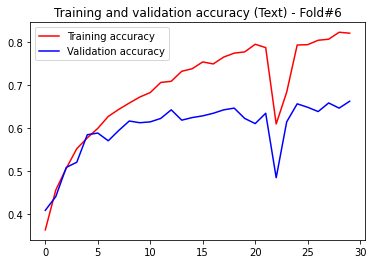

<Figure size 432x288 with 0 Axes>

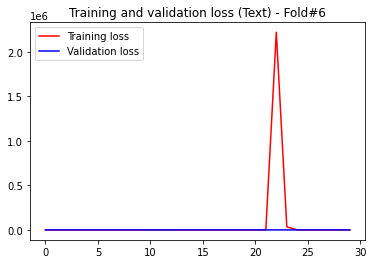

<Figure size 432x288 with 0 Axes>

Saving Model for fold #6...
Score for fold #6: loss of 1.0514512300491332; acc of 66.20000004768372%


------------------------------------------------------------------------
Training for fold #7 ...
Train on 4500 samples, validate on 500 samples
Epoch 1/30
4500/4500 [==============================] - 50s 11ms/sample - loss: 1.3852 - acc: 0.3367 - val_loss: 1.3390 - val_acc: 0.3860
Epoch 2/30
4500/4500 [==============================] - 43s 10ms/sample - loss: 1.2693 - acc: 0.4369 - val_loss: 1.2266 - val_acc: 0.4980
Epoch 3/30
4500/4500 [==============================] - 43s 10ms/sample - loss: 1.1481 - acc: 0.5218 - val_loss: 1.1599 - val_acc: 0.5320
Epoch 4/30
4500/4500 [==============================] - 43s 10ms/sample - loss: 1.0836 - acc: 0.5536 - val_loss: 1.1315 - val_acc: 0.5300
Epoch 5/30
4500/4500 [==============================] - 42s 9ms/sample - loss: 1.0474 - acc: 0.5907 - val_loss: 1.1089 - val_acc: 0.5500
Epoch 6/30
4500/4500 [==============================] - 43s 10ms/sample - loss: 0.9680 - acc: 0.6122 - val_loss: 1.0525 - val_acc: 0.5940
Epoch 7/30
4500/4500 [======

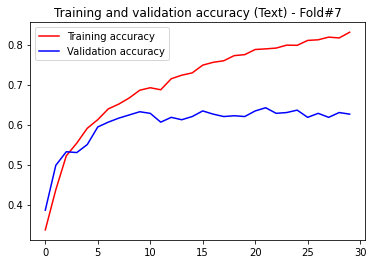

<Figure size 432x288 with 0 Axes>

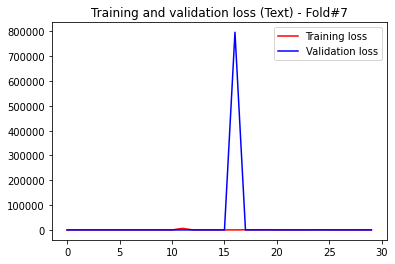

<Figure size 432x288 with 0 Axes>

Saving Model for fold #7...
Score for fold #7: loss of 1.5237969889640808; acc of 62.59999871253967%


------------------------------------------------------------------------
Training for fold #8 ...
Train on 4500 samples, validate on 500 samples
Epoch 1/30
4500/4500 [==============================] - 50s 11ms/sample - loss: 1.3898 - acc: 0.3589 - val_loss: 1.2677 - val_acc: 0.4880
Epoch 2/30
4500/4500 [==============================] - 43s 10ms/sample - loss: 1.2717 - acc: 0.4393 - val_loss: 1.1745 - val_acc: 0.4960
Epoch 3/30
4500/4500 [==============================] - 42s 9ms/sample - loss: 1.2420 - acc: 0.5167 - val_loss: 1.4030 - val_acc: 0.5180
Epoch 4/30
4500/4500 [==============================] - 43s 10ms/sample - loss: 1.7205 - acc: 0.5376 - val_loss: 1.1216 - val_acc: 0.5320
Epoch 5/30
4500/4500 [==============================] - 43s 10ms/sample - loss: 1.2171 - acc: 0.5651 - val_loss: 1.0996 - val_acc: 0.5540
Epoch 6/30
4500/4500 [==============================] - 43s 9ms/sample - loss: 1.3713 - acc: 0.5889 - val_loss: 1.0579 - val_acc: 0.5740
Epoch 7/30
4500/4500 [=======

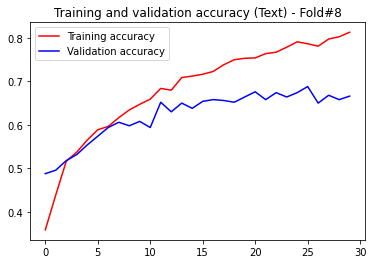

<Figure size 432x288 with 0 Axes>

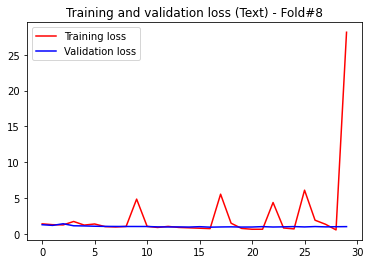

<Figure size 432x288 with 0 Axes>

Saving Model for fold #8...
Score for fold #8: loss of 1.2653907442092895; acc of 66.39999747276306%


------------------------------------------------------------------------
Training for fold #9 ...
Train on 4500 samples, validate on 500 samples
Epoch 1/30
4500/4500 [==============================] - 52s 12ms/sample - loss: 1.3797 - acc: 0.3311 - val_loss: 1.3091 - val_acc: 0.4340
Epoch 2/30
4500/4500 [==============================] - 43s 10ms/sample - loss: 1.3121 - acc: 0.4307 - val_loss: 1.1941 - val_acc: 0.5280
Epoch 3/30
4500/4500 [==============================] - 43s 10ms/sample - loss: 1.1963 - acc: 0.4929 - val_loss: 1.1256 - val_acc: 0.5400
Epoch 4/30
4500/4500 [==============================] - 44s 10ms/sample - loss: 1.2153 - acc: 0.5271 - val_loss: 1.1167 - val_acc: 0.5440
Epoch 5/30
4500/4500 [==============================] - 43s 10ms/sample - loss: 1.0896 - acc: 0.5651 - val_loss: 1.0605 - val_acc: 0.5740
Epoch 6/30
4500/4500 [==============================] - 43s 9ms/sample - loss: 1.1386 - acc: 0.5909 - val_loss: 1.0522 - val_acc: 0.5700
Epoch 7/30
4500/4500 [======

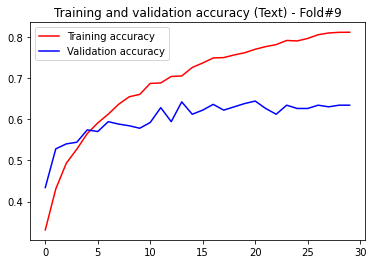

<Figure size 432x288 with 0 Axes>

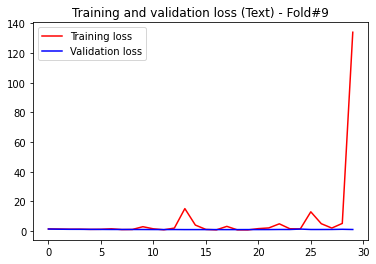

<Figure size 432x288 with 0 Axes>

Saving Model for fold #9...
Score for fold #9: loss of 0.9992069153785705; acc of 63.40000033378601%


------------------------------------------------------------------------
Training for fold #10 ...
Train on 4500 samples, validate on 500 samples
Epoch 1/30
4500/4500 [==============================] - 53s 12ms/sample - loss: 1.3769 - acc: 0.3542 - val_loss: 1.2710 - val_acc: 0.4900
Epoch 2/30
4500/4500 [==============================] - 44s 10ms/sample - loss: 1.2611 - acc: 0.4536 - val_loss: 1.1693 - val_acc: 0.5500
Epoch 3/30
4500/4500 [==============================] - 45s 10ms/sample - loss: 1.3376 - acc: 0.5127 - val_loss: 1.1166 - val_acc: 0.5980
Epoch 4/30
4500/4500 [==============================] - 44s 10ms/sample - loss: 1.1278 - acc: 0.5482 - val_loss: 1.0725 - val_acc: 0.5880
Epoch 5/30
4500/4500 [==============================] - 44s 10ms/sample - loss: 1.1845 - acc: 0.5702 - val_loss: 1.0538 - val_acc: 0.6000
Epoch 6/30
4500/4500 [==============================] - 45s 10ms/sample - loss: 11808.8792 - acc: 0.5547 - val_loss: 94.4859 - val_acc: 0.4780
Epoch 7/30
4500/4500 

In [ ]:
# Train model
for train_index, test_index in kfold.split(dataset):

    X_train = dataset.iloc[train_index]['sentences'].to_numpy()
    X_val = dataset.iloc[test_index]['sentences'].to_numpy()

    y_train = label_encode[train_index]
    y_val = label_encode[test_index]


    model = tf.keras.Sequential([
                                hub_layer,
                                tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(256, 
                                                                                   return_sequences=True,
                                                                                   activation= 'relu',
                                                                                   dropout=0.4, 
                                                                                   kernel_regularizer=regularizers.l2(1e-5))),
                                tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(256, 
                                                                                   activation= 'relu', 
                                                                                   dropout=0.5, 
                                                                                   kernel_regularizer=regularizers.l2(1e-5))),
                                # tf.keras.layers.Average(),
                                tf.keras.layers.Dense(128, activation='relu'),
                                tf.keras.layers.Dense(no_classes, activation='softmax')
    ])

    model.compile(loss=loss_function,
                  optimizer=optimizer,
                  metrics=['accuracy'])
    
    # Provide training information
    print('------------------------------------------------------------------------')
    print(f'Training for fold #{fold} ...')

    history = model.fit(X_train,
                        y_train,
                        epochs=no_epochs,
                        batch_size=batch_size,
                        verbose=verbosity,
                        validation_data=(X_val, y_val))
    
    acc_plot(history, fold, save_path='/content/drive/MyDrive/Colab Notebooks/My Project - SER/fold_result_plot/text')
    loss_plot(history, fold, save_path='/content/drive/MyDrive/Colab Notebooks/My Project - SER/fold_result_plot/text')
    
    loss, acc = model.evaluate(X_val, y_val, verbose=0)

    print(f'Saving Model for fold #{fold}...')
    model.save(f'/content/drive/MyDrive/Colab Notebooks/My Project - SER/text_fold_models/fold_{fold}_model.h5')

    # loss, acc = history.history['loss'][-1], history.history['acc'][-1]

    print(f'Score for fold #{fold}: {model.metrics_names[0]} of {loss}; {model.metrics_names[1]} of {acc * 100}%')
    acc_per_fold.append(acc * 100)
    loss_per_fold.append(loss)

    fold += 1 # Increase fold number

In [1]:
# == Provide average scores ==
print('------------------------------------------------------------------------')
print('Score per fold')
for index, acc in enumerate(acc_per_fold):
  print('------------------------------------------------------------------------')
  print(f'> Fold {index+1} - Loss: {loss_per_fold[index]} - Accuracy: {acc_per_fold[index]}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print('------------------------------------------------------------------------')

------------------------------------------------------------------------
Score per fold


NameError: ignored